In questa parte ci occupiamo della parte 'demografica' della Serie A. Adremo ad analizzare come son distribuite le età, le nazionalità ed i minuti giocati, per i portieri. 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
data = pd.read_excel('attaccanti_23.xlsx')

# Elenco dei file da leggere
files = ['portieri_23.xlsx', 'portieri_22.xlsx', 'portieri_21.xlsx', 'portieri_20.xlsx', 'portieri_19.xlsx']

# Faccio un dizionario per mappare i file agli anni
year= {'portieri_23.xlsx': 2023, 'portieri_22.xlsx':2022, 'portieri_21.xlsx':2021, 'portieri_20.xlsx':2020,
        'portieri_19.xlsx':2019}

Dopo aver importato i file necessari andiamo ad analizzare come sono variate le età nei 5 anni analizzati, visualizziamo il tutto con un diagramma a torta.

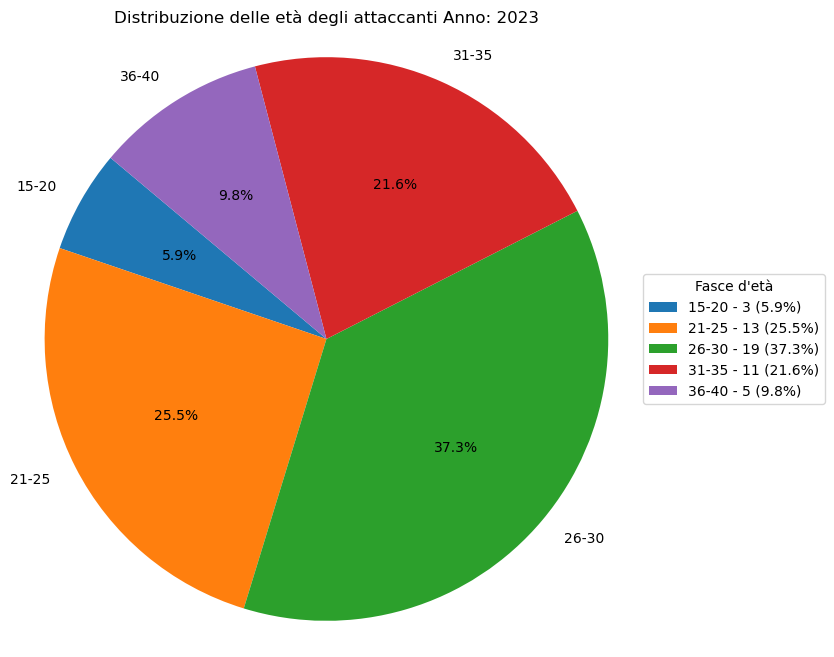

La media dell'età per l'anno 2023 è: 27.98


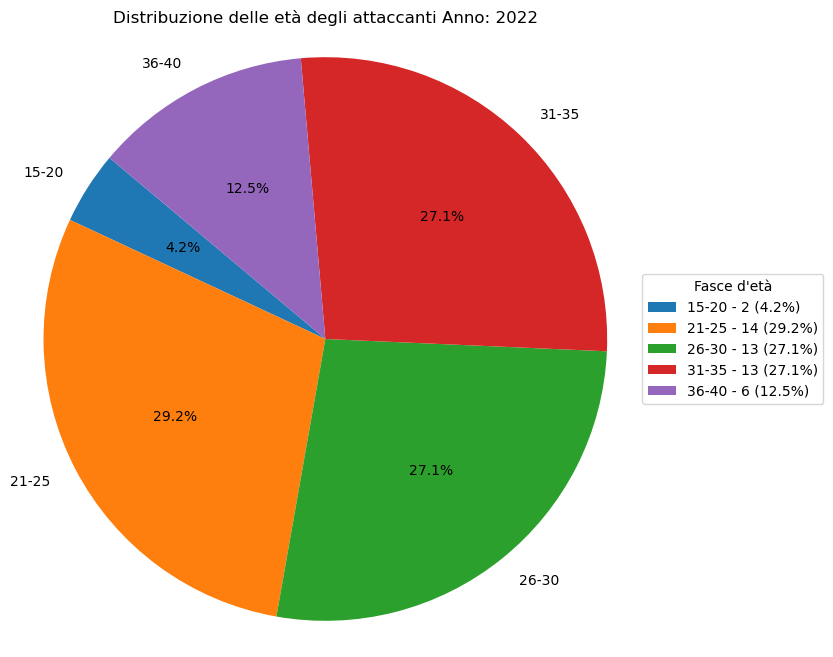

La media dell'età per l'anno 2022 è: 29.04


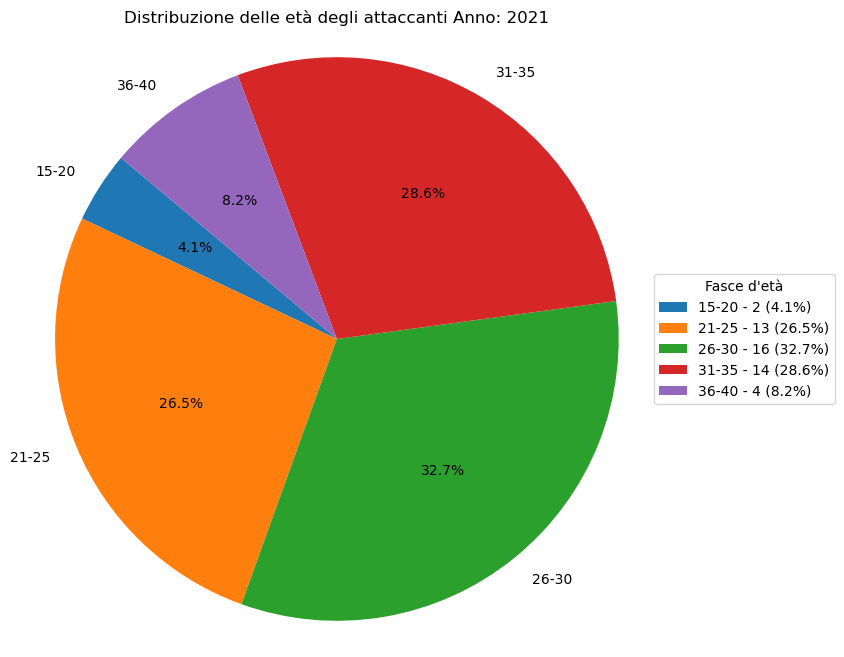

La media dell'età per l'anno 2021 è: 28.47


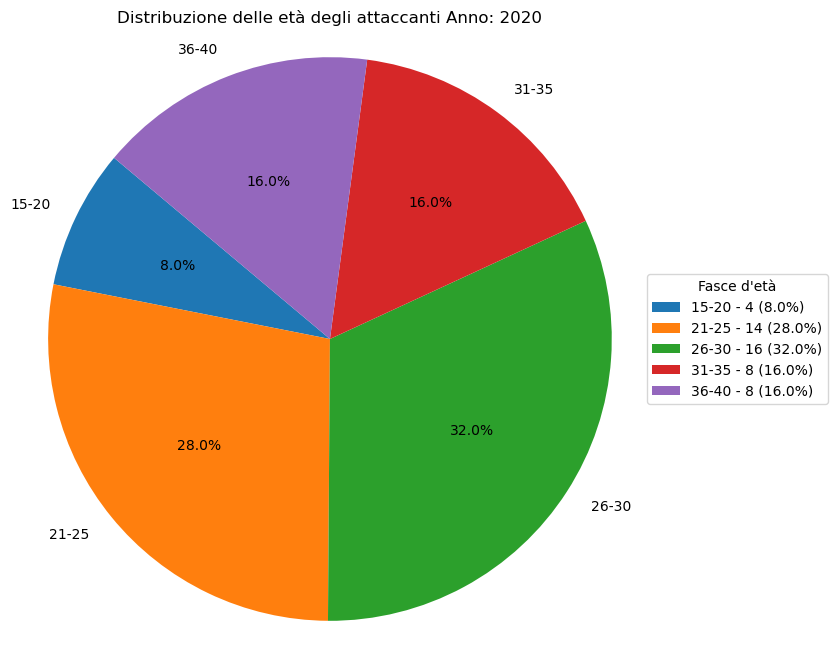

La media dell'età per l'anno 2020 è: 28.55


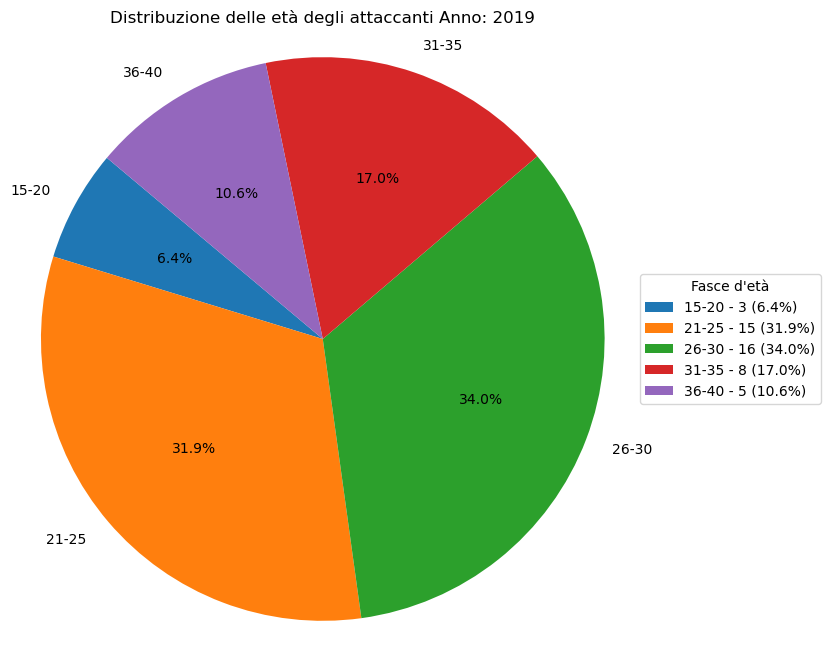

La media dell'età per l'anno 2019 è: 27.81


In [19]:
# Diagrammi a torta

# Definisci le fasce di età
bins = [15, 20, 25, 30, 35, 40]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40']

# Ciclo sui file per generare i grafici
for file in files:
    # Leggi i dati da ogni file (si presuppone che ci sia una colonna 'Age')
    data = pd.read_excel(file)
    eta = data['Age']

    # Categorizza le età nelle fasce specificate
    eta_bins = pd.cut(eta, bins=bins, labels=labels, right=True, include_lowest=True)

    # Conta il numero di attaccanti in ciascuna fascia
    eta_counts = eta_bins.value_counts().sort_index()

    # Crea una figura e un oggetto ax
    fig, ax = plt.subplots(figsize=(8, 8))

    # Crea il diagramma a torta sull'oggetto ax
    ax.pie(eta_counts, labels=eta_counts.index, autopct='%1.1f%%', startangle=140)

    # Imposta il titolo per ogni anno
    ax.set_title(f"Distribuzione delle età dei portieri Anno: {year[file]}")

    # Assicura che il grafico sia circolare
    ax.axis('equal')

    # Aggiungi la legenda con i valori percentuali
    ax.legend([f"{label} - {int(count)} ({pct:.1f}%)" for label, count, 
               pct in zip(eta_counts.index, eta_counts, 100*eta_counts/eta_counts.sum())],
              title="Fasce d'età", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Mostra il diagramma a torta
    plt.show()
    
    # Calcola e stampa la media dell'età
    media_eta = eta.mean()
    print(f"La media dell'età per l'anno {year[file]} è: {media_eta:.2f}")


Negli anni la media dell'età dei portieri ha avuto un andamento particolare, infatti nel 2019 l'età media risultava essere 27.81 anni. Con il tempo è aumentata fino ad arrivare a 29.04 anni. Per poi scendere nuovamente, infatti nel 2023 l'età media risulta essere 27.98 anni.

Passiamo ora all'analisi delle nazionalità. Vediamo quali sono le nazionalità più presenti in Serie A.

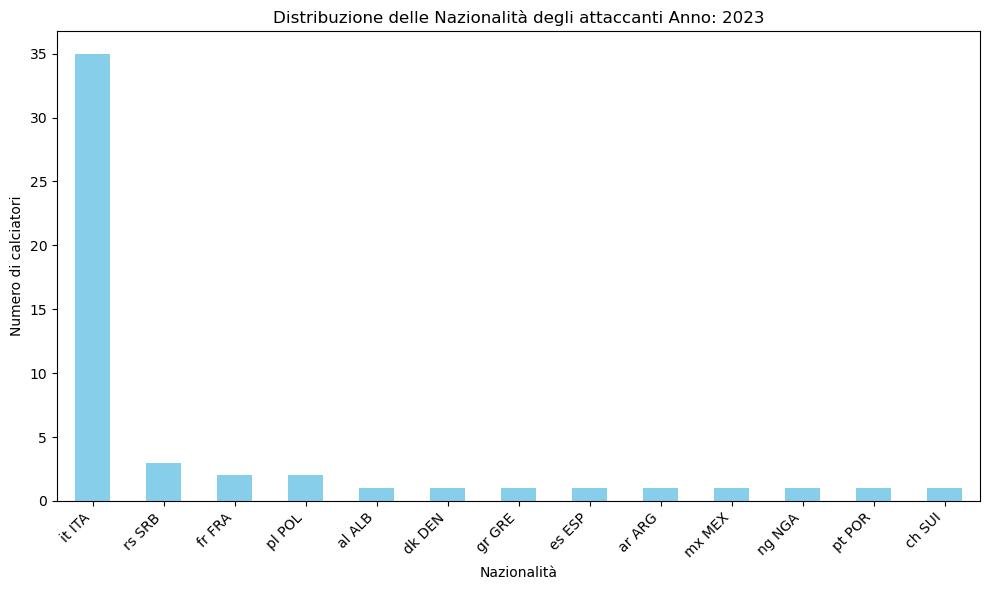

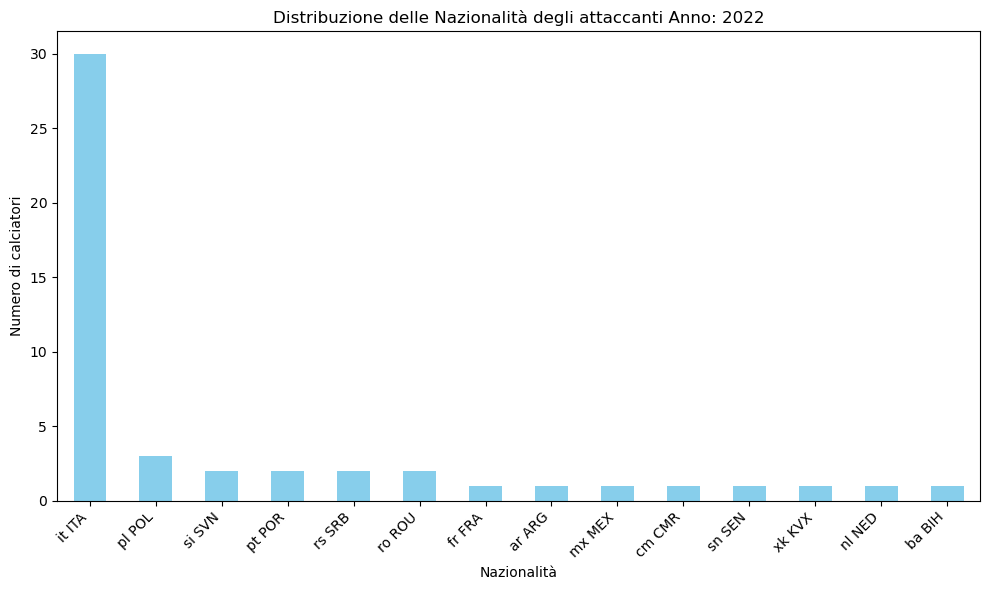

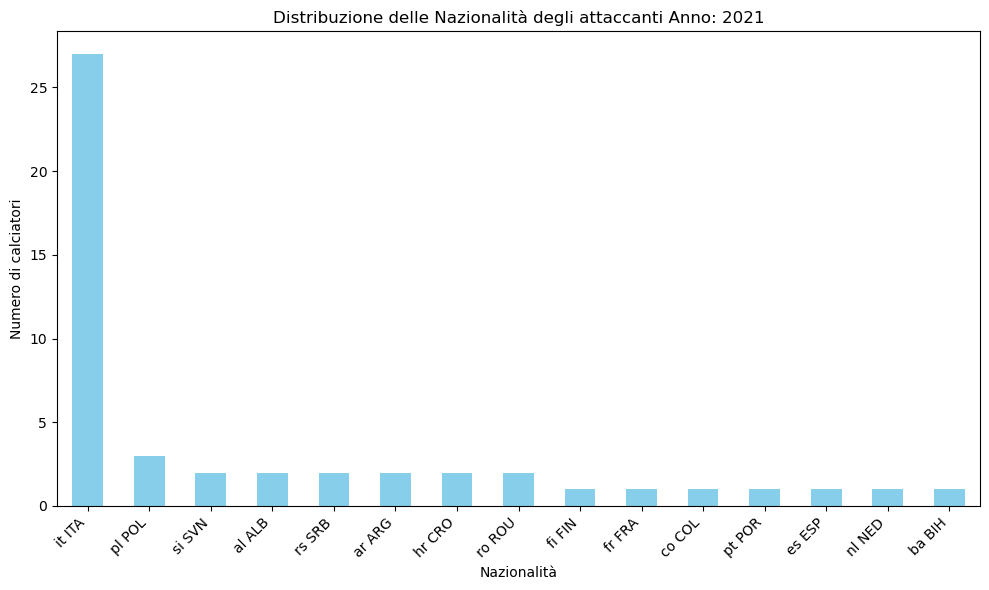

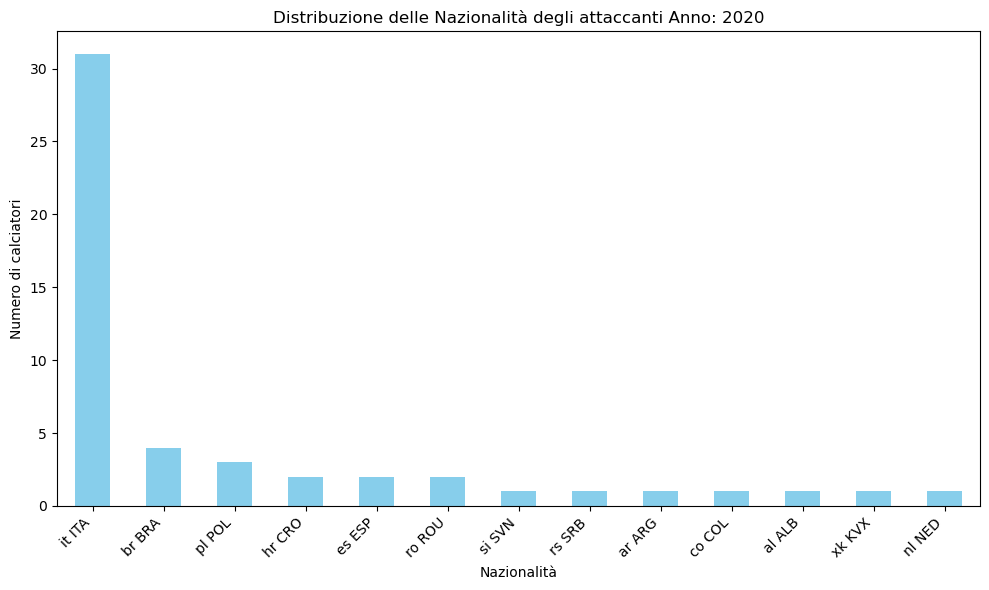

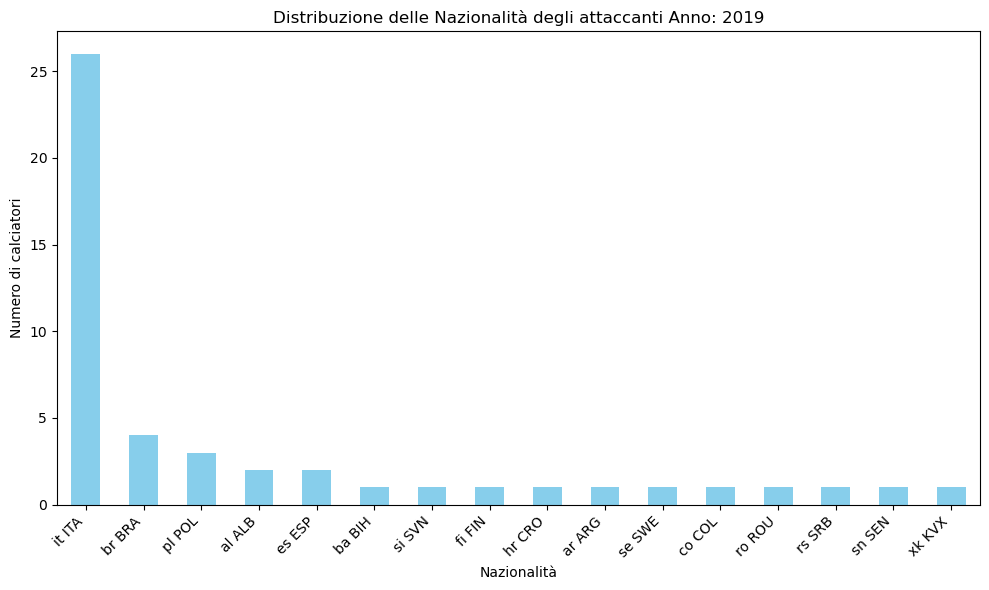

In [20]:
# Ciclo sui file per generare i grafici
for file in files:

    data = pd.read_excel(file)
     
    nazionalita = data['Nation']   #istogramma nazionalità

    # Conta il numero di calciatori per ciascuna nazionalità
    nazionalita_counts = nazionalita.value_counts()

    # Crea l'istogramma
    fig, ax = plt.subplots(figsize=(10, 6))
    nazionalita_counts.plot(kind='bar', ax=ax, color='skyblue')

    # Aggiungi i titoli e le etichette
    ax.set_title(f'Distribuzione delle Nazionalità dei portieri Anno: {year[file]}')
    ax.set_xlabel('Nazionalità')
    ax.set_ylabel('Numero di calciatori')

    # Ruota le etichette sull'asse x per una migliore leggibilità
    plt.xticks(rotation=45, ha='right')

    # Mostra il grafico
    plt.tight_layout()
    plt.show()

La prima cosa che si nota è che rispetto agli altri ruoli sono presenti molte meno nazionalità. Anche qui l'italia fa da padrona, essendo prima in tutte le stagioni. Notiamo inoltre che, tolta ovviamente l'Italia l'unica nazione che viene rappresentata da diversi giocatori è la Polonia.

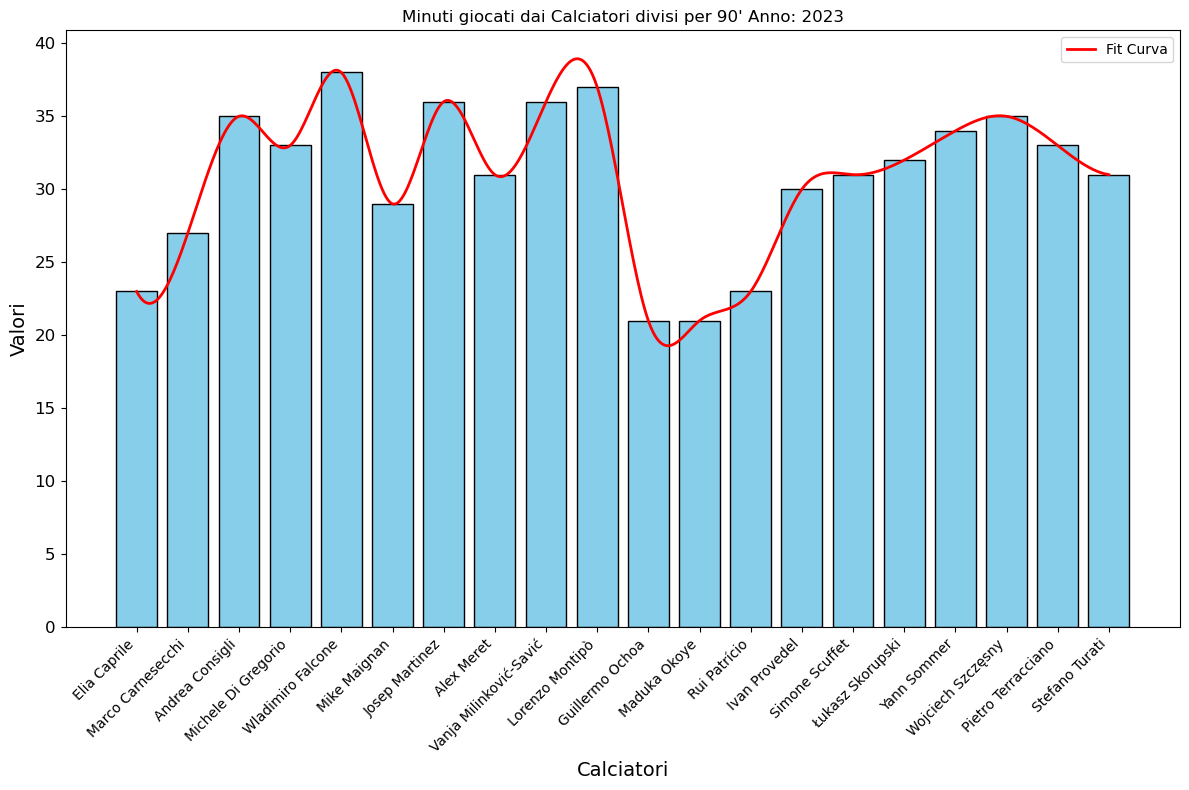

La media per l'Anno 2023 è:30.8


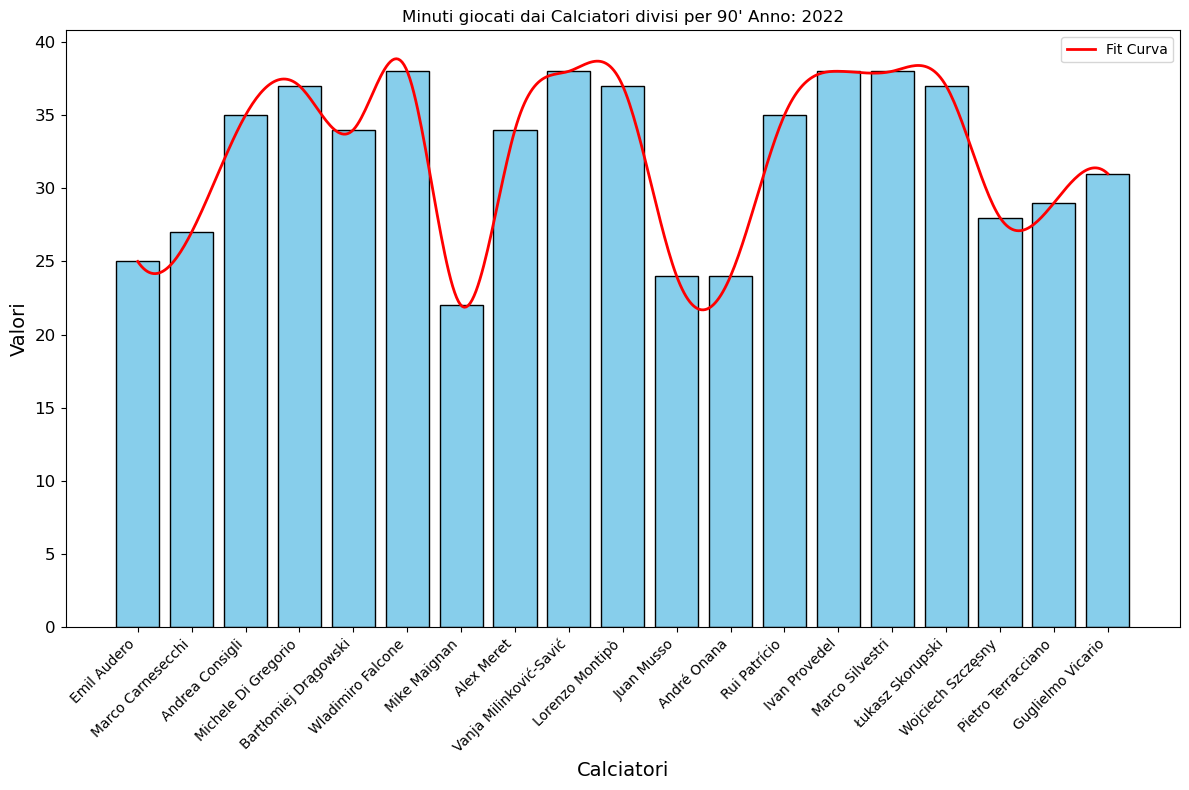

La media per l'Anno 2022 è:32.1578947368421


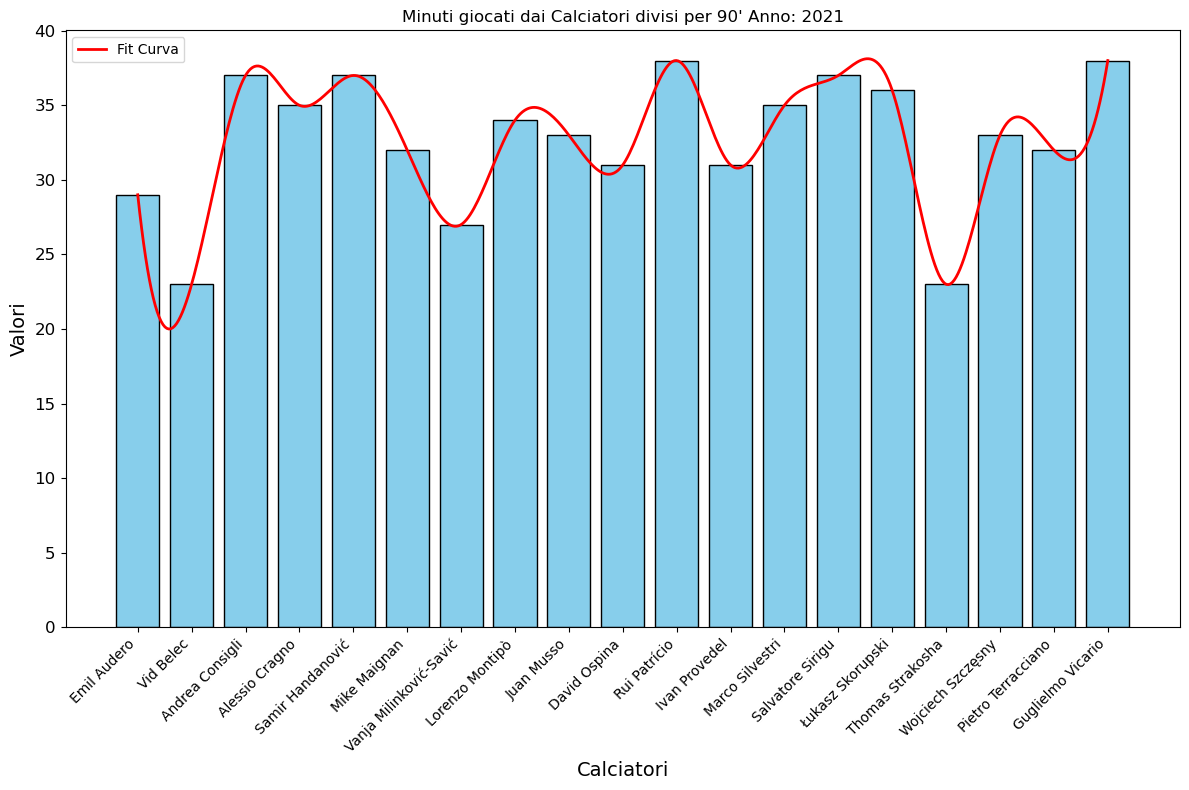

La media per l'Anno 2021 è:32.68421052631579


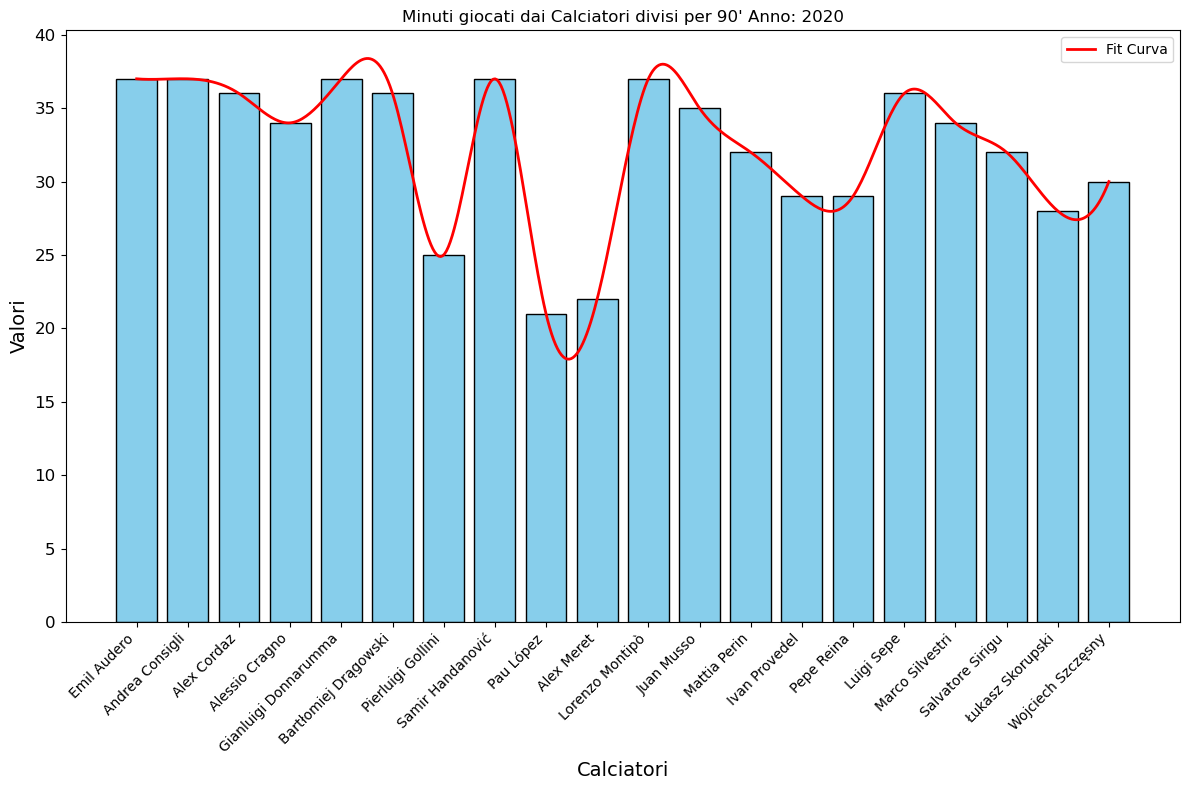

La media per l'Anno 2020 è:32.2


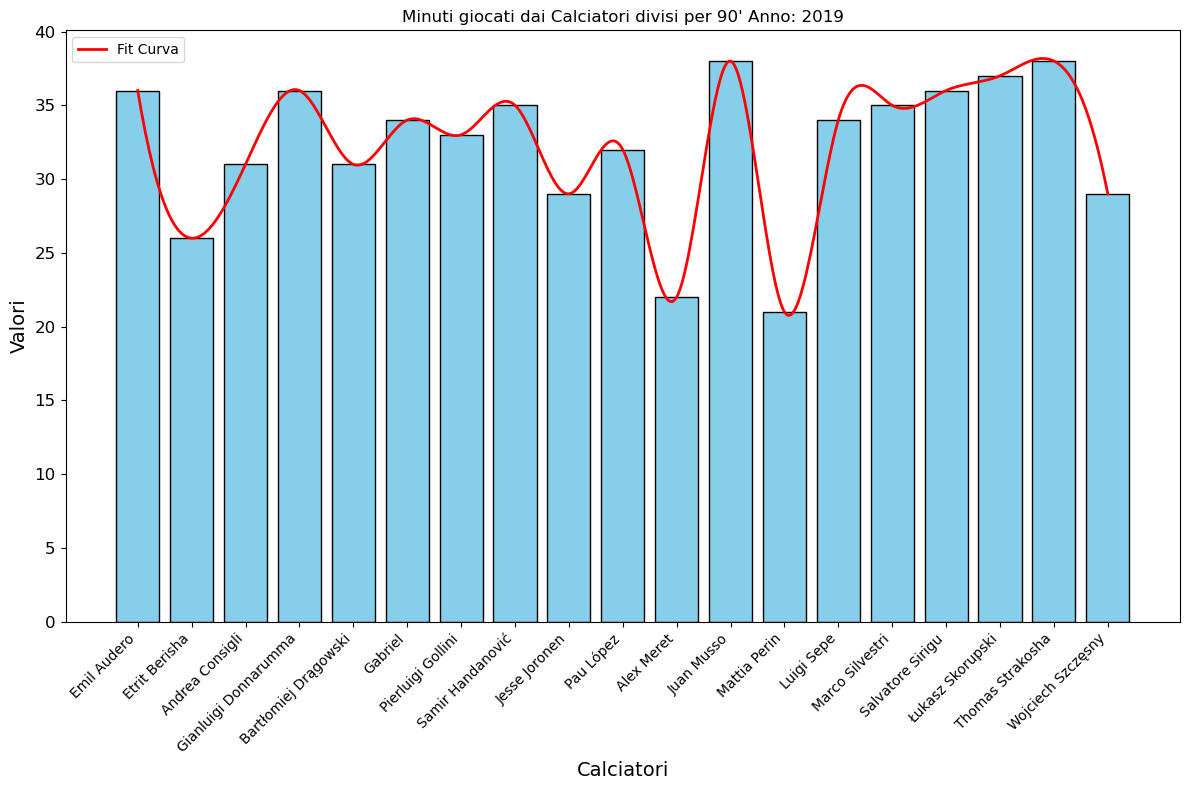

La media per l'Anno 2019 è:32.26315789473684


In [21]:
import numpy as np
from scipy.interpolate import make_interp_spline
for file in files:
 data = pd.read_excel(file)

 # Estrai i dati rilevanti (calciatori e valori nella settima colonna)
 calciatori = data['Player']  # Assume che i nomi dei calciatori siano nella prima colonna
 valori = data['MP']      # Settima colonna partendo da sinistra

 filtrato = valori > 20
 calciatori_filtrati = calciatori[filtrato]
 valori_filtrati = valori[filtrato]

 # Crea un istogramma
 plt.figure(figsize=(12, 8))
 plt.bar(calciatori_filtrati, valori_filtrati, color='skyblue', edgecolor='black')

 # Ottimizza il layout
 plt.xlabel('Calciatori', fontsize=14)
 plt.ylabel('Valori', fontsize=14)
 plt.title(f"Minuti giocati dai Calciatori divisi per 90' Anno: {year[file]}")
 plt.xticks(rotation=45, ha='right', fontsize=10)
 plt.yticks(fontsize=12)

 # Aggiungi una curva di fit
 x = np.arange(len(calciatori_filtrati))  # Converti l'indice dei calciatori filtrati in numerico
 spl = make_interp_spline(x, valori_filtrati, k=3)  # Fit con spline
 x_smooth = np.linspace(x.min(), x.max(), 500)  # Genera un range di valori lisciato
 y_smooth = spl(x_smooth)

 plt.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Fit Curva')

 plt.tight_layout()
 plt.legend()
 plt.show()

 media_valori_filtrati = valori_filtrati.mean()

 # Mostra il risultato
 print(f"La media per l'Anno {year[file]} è:{media_valori_filtrati}")

Come era logico aspettarsi, essendo il portiere un ruolo che viene raramente sostituito, la media dei minuti giocati su 90 è molto alta per tutti gli anni. Possiamo notare anche picchi di portieri che hanno giocato addirittura tutte e 38 le partite. Il motivo per cui le squadre non mettono sempre i portieri titolari è per il turnover (mettere i "secondi" giocatori per far riposare i titolari in vista di partite più importanti)

In [ ]:
import scipy.stats as stats
import numpy as np

for file in files:
 data = pd.read_excel(file)

# Selezionare solo le colonne numeriche
numeric_data = data.select_dtypes(include=[np.number])

# Funzione per calcolare il numero di bin con la regola di Freedman-Diaconis
def freedman_diaconis_bins(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    if iqr == 0:  # Evitare divisioni per zero
        return 20  # Numero di bin di default in caso di IQR nullo
    bin_width = 2 * iqr / (len(data) ** (1 / 3))
    if bin_width == 0:
        return 5  # Numero di bin di default in caso di width troppo piccolo
    return int(np.ceil((data.max() - data.min()) / bin_width))

# Creare istogrammi per ogni colonna numerica con controllo su variazioni minime
for column in numeric_data.columns:
    col_data = numeric_data[column].dropna()  # Rimuovi eventuali valori NaN
    if col_data.empty or col_data.max() == col_data.min():
        continue
    
    # Calcolare il numero di bin con la regola di Freedman-Diaconis
    bins = freedman_diaconis_bins(col_data)
    
    # Creare l'istogramma
    plt.figure(figsize=(10, 6))
    plt.hist(col_data, bins=bins, density=False, color='k', edgecolor = 'r', label='Dati')

    # Titolo e etichette
    plt.title(f'Istogramma della colonna: {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Numero di giocatori')

    # Mostrare il grafico
    #plt.show()
    media = col_data.mean()
    #print(f"La media di {column} per l'anno {year[file]} è: {media:.2f}")

Con questa funzione possiamo richiamare dei grafici specifici e analizzarli se ci interessa.

In [24]:
# Mappatura dei file agli anni
year_mapping = {2023: 'portieri_23.xlsx', 2022: 'portieri_22.xlsx', 2021: 'portieri_21.xlsx',2020: 'portieri_20.xlsx',
    2019: 'portieri_19.xlsx'}

def istogramma(statistica, anno):
    # Verifica che l'anno esista nel mapping
    if anno not in year_mapping:
        print(f"L'anno {anno} non è valido. Gli anni disponibili sono: {list(year_mapping.keys())}")
        return

    # Carica il dataset corrispondente all'anno
    file = year_mapping[anno]
    data = pd.read_excel(file)

    # Seleziona la colonna specificata
    if statistica not in data.columns:
        print(f"La statistica '{statistica}' non è presente nei dati.")
        return
    
    col_data = data[statistica].dropna()  # Rimuovi eventuali valori NaN

    if col_data.empty or col_data.max() == col_data.min():
        print(f"La colonna '{statistica}' non ha abbastanza variabilità per creare un istogramma.")
        return

    # Calcolare il numero di bin con la regola di Freedman-Diaconis
    def freedman_diaconis_bins(data):
        q25, q75 = np.percentile(data, [25, 75])
        iqr = q75 - q25
        if iqr == 0:  # Evitare divisioni per zero
            return 20  # Numero di bin di default in caso di IQR nullo
        bin_width = 2 * iqr / (len(data) ** (1 / 3))
        if bin_width == 0:
            return 5  # Numero di bin di default in caso di width troppo piccolo
        return int(np.ceil((data.max() - data.min()) / bin_width))

    # Calcolare il numero di bin
    bins = freedman_diaconis_bins(col_data)

    # Creare l'istogramma
    plt.figure(figsize=(10, 6))
    plt.hist(col_data, bins=bins, density=False, color='k', edgecolor='r', label='Dati')

    # Titolo e etichette con l'anno specificato
    plt.title(f'Istogramma della colonna: {statistica} ({anno})')
    plt.xlabel(f'{statistica}')
    plt.ylabel('Numero di giocatori')

    # Mostrare il grafico
    plt.show()

    # Calcola e stampa la media della colonna
    media = col_data.mean()
    print(f"La media di {statistica} per l'anno {anno} è: {media:.2f}")
    giocatore_max = data.loc[data[statistica].idxmax()]['Player']
    max_value = col_data.max()
    print(f"Il giocatore che ha registrato il maggior numero di {statistica} è {giocatore_max} con {max_value:.2f}.")


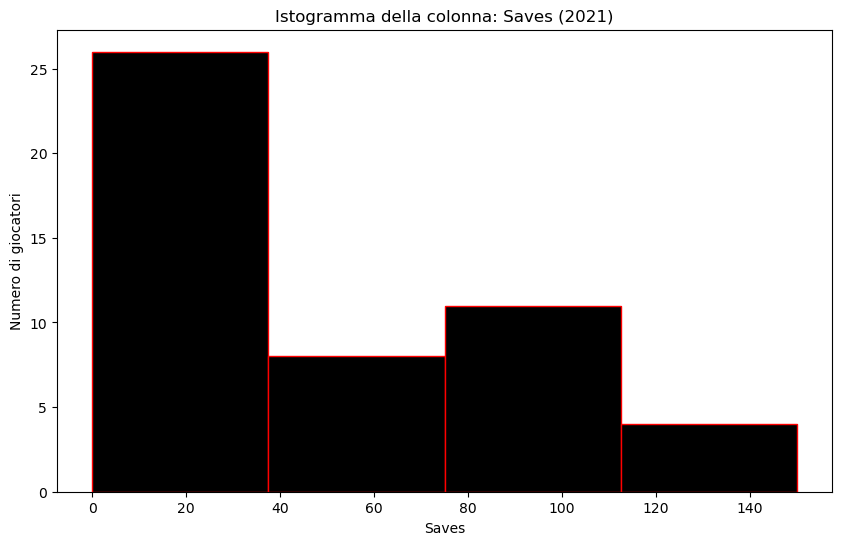

La media di Saves per l'anno 2021 è: 45.47
Il giocatore che ha registrato il maggior numero di Saves è Guglielmo Vicario con 150.00.


In [44]:
statistica = 'Saves'
anno = 2021
istogramma(statistica,anno)